In [1]:
import os

In [2]:
from pm4py.algo.discovery.dfg import factory as dfg_factory
from pm4py.objects.log.adapters.pandas import csv_import_adapter
from pm4py.algo.discovery.dfg.adapters.pandas import df_statistics
from pm4py import util as pmutil

from pandas import read_csv
file = read_csv(os.path.join("files","input_data","sepsis.csv"))

log = csv_import_adapter.convert_timestamp_columns_in_df(file, timest_columns=[
    'timestamp'
])
dfg_frequency, dfg_performance = df_statistics.get_dfg_graph(log, measure="both",
                                                            activity_key='activity',
                                                            timestamp_key='timestamp',
                                                            case_id_glue='case_id')

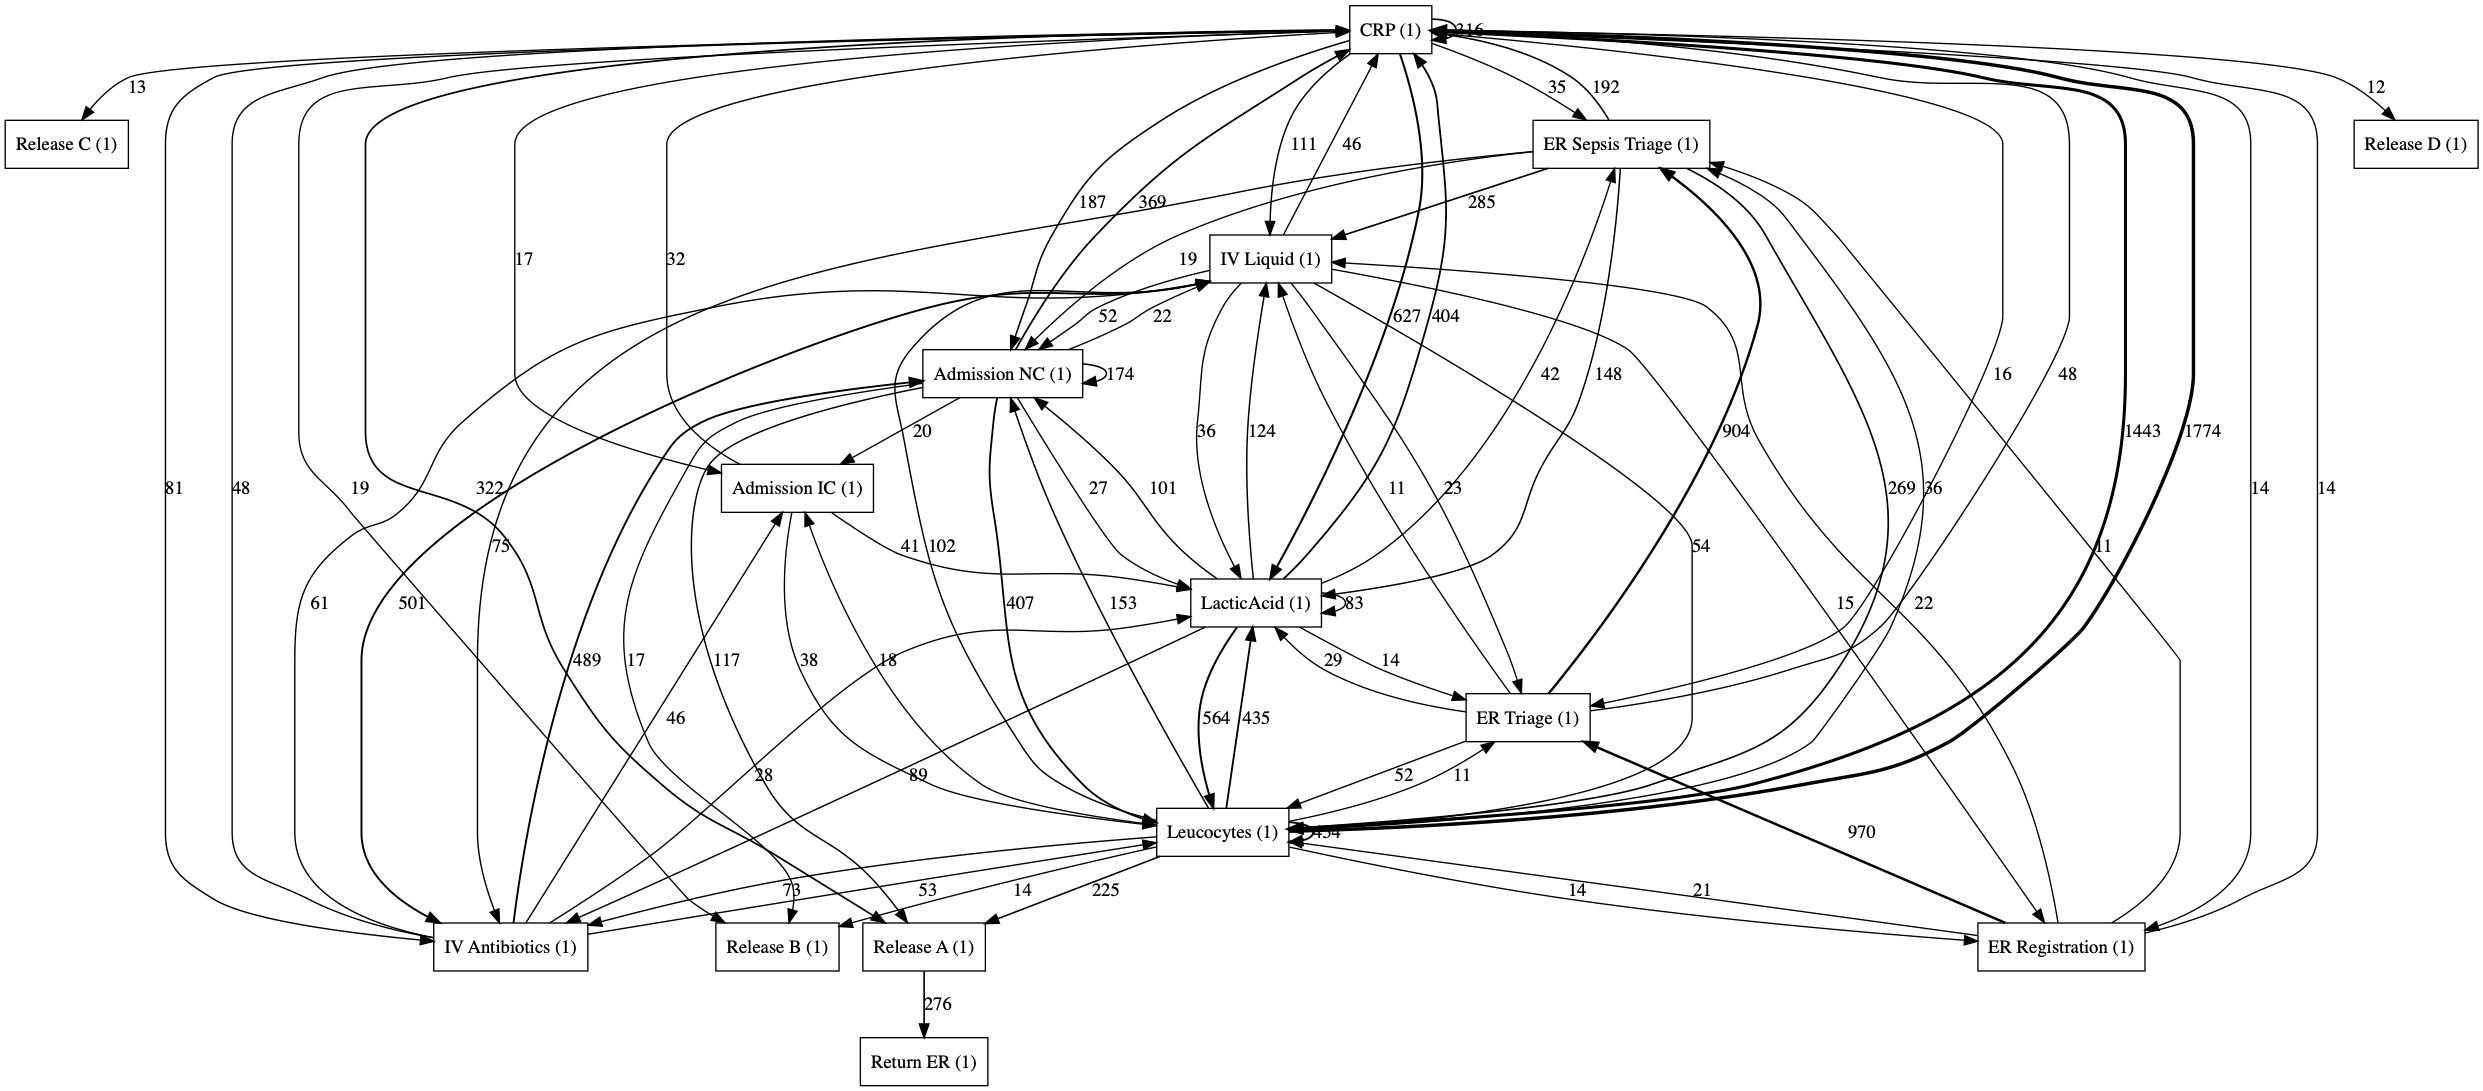

In [3]:
from pm4py.visualization.dfg import factory as dfg_vis_factory

gviz = dfg_vis_factory.apply(dfg_frequency, variant="frequency")
dfg_vis_factory.view(gviz)

In [4]:
from ntnu_process_mining import ProcessMap

pm_edges = []
for (src, dst), weight in dfg_frequency.items():
    pm_edges.append({"from": src, "to": dst, "value": weight})

process_map = ProcessMap()
process_map.value = pm_edges
process_map

ProcessMap(value=[{'from': 'Admission IC', 'to': 'CRP', 'value': 32}, {'from': 'Admission IC', 'to': 'LacticAc…